# 3 inputs, 2 output
# Class + Explicit network definition

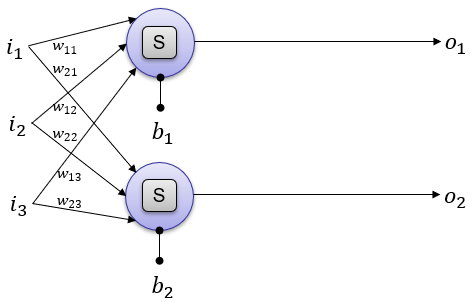

In [1]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i3_o2_sigmoid_01a.png", width=500)

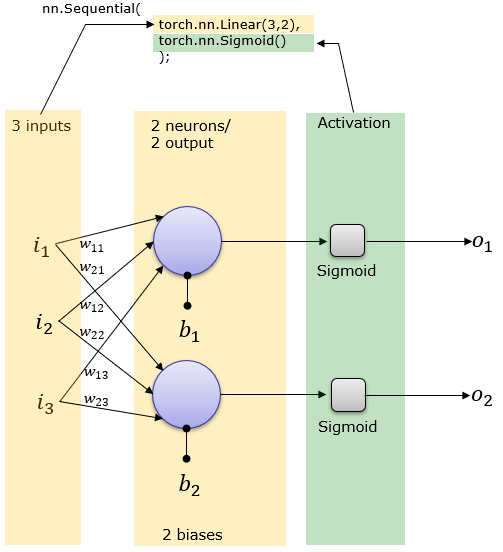

In [2]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i3_o2_sigmoid_01.png", width=500)

# Prerequisites

In [3]:
import torch
from torch import nn
from torch import optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#predictive
torch.manual_seed(1);

device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')  
    
#sigmoid explicit
def sigmoid(x):
    return 1/(1+torch.exp(-x))

#sigmoid pre-defined
activation = torch.nn.Sigmoid()

# Loss (Binary Cross Entropy) error function, explicit def
def bce_err(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)

#sigmoid + BCELoss (Binary Cross Entropy)
criterion = torch.nn.BCEWithLogitsLoss()

def state(interval,i,loss,out,y):
    if(i%interval == 0):
        print("\n========== Epoch", i,"==========")
        print("loss=",loss)
    
        #to numpy
        out1 = out.data.numpy()
        y3 = y.numpy()
        #all values less than 0.5 to < 0
        out2 = out1-0.5
        # <0.5 turned to False, >= 0.5 turned to True
        out3 = (out2>=0)
        #boolean to decimal 0/1
        out4=out3*1   
        #boolean results
        rez = (out4 == y3)        
        #procent of True's(exact classification: y_hat=y, prediction = label/target)
        accuracy = np.min(np.mean(rez,axis=0))
        print("accuracy=",accuracy)        

#training points
data = np.array([
    [0.1,0.2,0.2,0,0],
    [0.1,0.2,0.5,0,1],
    [0.4,0.7,-0.3,1,0],
    [-0.1,0.3,0.8,1,1],
    [-0.1,0.8,0.8,1,0],
    [0.75,0.4,0.4,0,1],
])         

### Class + Explicit network definition

In [4]:
torch.manual_seed(1);

#features
x = torch.from_numpy(data[:, 0:3]).double()
#target/labels
y = torch.from_numpy(data[:, [3,4]]).double()

class NN:
    
    def __init__(self, n_input, n_hidden, n_output):
        
        # Weights for inputs to hidden layer
        self.w1 = torch.randn(n_input, n_hidden, dtype=torch.double, requires_grad=True)
        # and bias terms for hidden and output layers
        self.b1 = torch.randn(1, n_hidden, dtype=torch.double, requires_grad=True)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self,x):
        o = self.activation(torch.mm(x,self.w1)+(self.b1))
        return o
    
net = NN(3,2,2)
print(x)
print(net.w1)
print(net.b1)
print(net.forward(x)) 

tensor([[ 0.1000,  0.2000,  0.2000],
        [ 0.1000,  0.2000,  0.5000],
        [ 0.4000,  0.7000, -0.3000],
        [-0.1000,  0.3000,  0.8000],
        [-0.1000,  0.8000,  0.8000],
        [ 0.7500,  0.4000,  0.4000]], dtype=torch.float64)
tensor([[ 0.6614,  0.2669],
        [ 0.0617,  0.6213],
        [-0.4519, -0.1661]], dtype=torch.float64, requires_grad=True)
tensor([[-1.5228,  0.3817]], dtype=torch.float64, requires_grad=True)
tensor([[0.1773, 0.6223],
        [0.1584, 0.6105],
        [0.2536, 0.7258],
        [0.1265, 0.6007],
        [0.1300, 0.6724],
        [0.2345, 0.6822]], dtype=torch.float64, grad_fn=<SigmoidBackward>)


In [5]:
#learn rate
alpha = 0.1
#iterations
epochs = 2000
#display state
fv = 500

lossHistory = []

for i in range(epochs):
    
    #forward: output/prediction
    out = net.forward(x)
    loss = torch.mean(bce_err(out,y))
         
    #backward: compute gradients
    loss.backward()   

    #update weights
    with torch.no_grad():
        net.w1 -= alpha * net.w1.grad
        net.b1 -= alpha * net.b1.grad

        # Manually zero the gradients after updating weights
        net.w1.grad.zero_()
        net.b1.grad.zero_()    

    lossHistory.append(loss)    
        
    state(fv,i,loss,out,y)


========== Epoch 0 ==========
loss= tensor(0.9069, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 0.5

========== Epoch 500 ==========
loss= tensor(0.5133, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 1.0

========== Epoch 1000 ==========
loss= tensor(0.4142, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 1.0

========== Epoch 1500 ==========
loss= tensor(0.3549, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 1.0


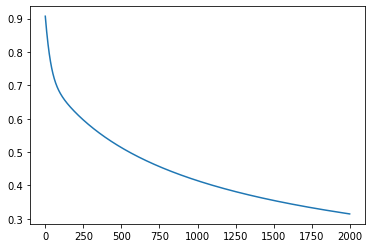

In [6]:
#loss evolution
graph_x = np.arange(0, epochs)
graph_y = lossHistory
plt.plot(graph_x, graph_y)
plt.show()

### Setting custom weights

In [7]:
net.w1 = torch.tensor( [[1, -1],
                        [1, -1],
                        [1, -1]], dtype=torch.float64, requires_grad=True)
net.b1 = torch.tensor( [[1, -1]], dtype=torch.float64, requires_grad=True)

print(x)
print(net.w1)
print(net.b1)
out = net.forward(x)
print("---\n",out,"\n---")

tensor([[ 0.1000,  0.2000,  0.2000],
        [ 0.1000,  0.2000,  0.5000],
        [ 0.4000,  0.7000, -0.3000],
        [-0.1000,  0.3000,  0.8000],
        [-0.1000,  0.8000,  0.8000],
        [ 0.7500,  0.4000,  0.4000]], dtype=torch.float64)
tensor([[ 1., -1.],
        [ 1., -1.],
        [ 1., -1.]], dtype=torch.float64, requires_grad=True)
tensor([[ 1., -1.]], dtype=torch.float64, requires_grad=True)
---
 tensor([[0.8176, 0.1824],
        [0.8581, 0.1419],
        [0.8581, 0.1419],
        [0.8808, 0.1192],
        [0.9241, 0.0759],
        [0.9276, 0.0724]], dtype=torch.float64, grad_fn=<SigmoidBackward>) 
---


In [8]:
net.w1 = torch.tensor( [[1, 1],
                        [1, 1],
                        [1, 1]], dtype=torch.float64, requires_grad=True)
net.b1 = torch.tensor( [[1, 1]], dtype=torch.float64, requires_grad=True)

print(x)
print(net.w1)
print(net.b1)
out = net.forward(x)
print("---\n",out,"\n---")

tensor([[ 0.1000,  0.2000,  0.2000],
        [ 0.1000,  0.2000,  0.5000],
        [ 0.4000,  0.7000, -0.3000],
        [-0.1000,  0.3000,  0.8000],
        [-0.1000,  0.8000,  0.8000],
        [ 0.7500,  0.4000,  0.4000]], dtype=torch.float64)
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], dtype=torch.float64, requires_grad=True)
tensor([[1., 1.]], dtype=torch.float64, requires_grad=True)
---
 tensor([[0.8176, 0.8176],
        [0.8581, 0.8581],
        [0.8581, 0.8581],
        [0.8808, 0.8808],
        [0.9241, 0.9241],
        [0.9276, 0.9276]], dtype=torch.float64, grad_fn=<SigmoidBackward>) 
---
